# <font color='Blue'>Distance Metrics in Clustering Basics</font>

## <font color='Blue'>Libary: Pyclustering</font>

Available metric types: EUCLIDEAN, EUCLIDEAN_SQUARE, CHEBYSHEV, MINKOWSKI, CANBERRA, CHI-SQUARE, GOWER

Before you execute this code, please install pyclustering. It can be done through the following steps.

First Run << conda update -n base -c defaults conda >> from Anaconda Shell

Next  Run << conda install -c conda-forge pyclustering >> from Anaconda Shell

For more information you may visit

https://anaconda.org/conda-forge/pyclustering
https://pypi.org/project/pyclustering/

Pyclustering DIstances: https://codedocs.xyz/annoviko/pyclustering/classpyclustering_1_1utils_1_1metric_1_1type__metric.html

Restart Kernel

## <font color='Blue'>Illustration</font>

We Shall try different distances in K-Medoids

You may apply different distance in various clustering techniques

## <font color='Blue'>Loading Libraries</font>

In [72]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [73]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [74]:
df = pd.read_csv( "Income Data.csv" )
data = df
sample = df
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [75]:
# Normalizing the features
scaler = StandardScaler()
sample = scaler.fit_transform(sample[["age", "income"]])
sample = sample.tolist()
sample

[[1.3701636978886997, 0.09718547866698415],
 [-1.3791282981016117, 0.9060274906201173],
 [1.1038884440397592, 0.5140502079043682],
 [0.2384938690307022, -1.2716240800229335],
 [-0.35396857078319105, -1.327620834696612],
 [0.3982590213400669, -1.2280710486100725],
 [-0.9198034852121894, 0.7442590882294907],
 [1.2969380030802415, 0.022523139102079554],
 [-0.22083094385872074, -1.6511576394778653],
 [0.6112792244192187, -0.4752257913306178],
 [-1.1661080950224596, 0.7567028114903082],
 [-1.2260200271384711, 1.067795893010744],
 [-1.1727649763686832, 1.198454987249327],
 [1.1638003761557711, 0.43316600670905486],
 [-1.3458438913704942, 0.9620242452937958],
 [0.35831773326272526, -1.327620834696612],
 [0.8908682409606065, 0.42694414507864614],
 [0.7777012580748065, 0.4207222834482374],
 [1.090574681347312, -1.084968231110672],
 [-1.2593044338695887, 0.850030735946439],
 [0.23183698768447905, -1.4209487591527428],
 [0.8442700715370417, 0.4020566985570113],
 [-1.2326769084846947, 0.8500307359

## <font color='Blue'>Distance Types</font>

In [76]:
distance_type = ['Euclidean','Manhattan','Chebyshev']

## <font color='Blue'>Defining Distance Metrics</font>

In [77]:
metric_euc = distance_metric(type_metric.EUCLIDEAN)
metric_man = distance_metric(type_metric.MANHATTAN)
metric_che = distance_metric(type_metric.CHEBYSHEV)

# Ref: https://codedocs.xyz/annoviko/pyclustering/classpyclustering_1_1utils_1_1metric_1_1type__metric.html

## <font color='Blue'>Initializing Random Initial Medoids</font>

In [78]:
initial_medoids = [0, 0, 0]

## <font color='Blue'>Create instance of K-Medoids algorithm with specific distance metric</font>

In [79]:
kmedoids_euc = kmedoids(sample, initial_medoids, metric=metric_euc)
kmedoids_man = kmedoids(sample, initial_medoids, metric=metric_man)
kmedoids_che = kmedoids(sample, initial_medoids, metric=metric_che)

print(kmedoids_euc)
print(kmedoids_man)
print(kmedoids_che)

## <font color='Blue'>Execute K-Medoids with Different Distance Metrics</font>

In [80]:
kmedoids_euc.process()
kmedoids_man.process()
kmedoids_che.process()

## <font color='Blue'>Obtain Results</font>

In [81]:
euc_clusters = kmedoids_euc.get_clusters()
man_clusters = kmedoids_man.get_clusters()
che_clusters = kmedoids_che.get_clusters()

## <font color='Blue'>Defining a Function to get clusters and their sizes</font>

In [82]:
def desclusters(distance_type,clusters):
    x = 0
    y = len(clusters)
    print("________________________________")
    print("")
    print("Distance Type:",distance_type)
    print("Total No of clusters: ", y)
    for z in range(y):
        print("Size of cluster ",z,":", len(clusters[z]))
        x = x+len(clusters[z])
    print("Total Size of all clusters:", x)
    print("________________________________")

## <font color='Blue'>Finding the number of clusters and sizes</font>

In [83]:
desclusters(distance_type[0],euc_clusters)
desclusters(distance_type[1],man_clusters)
desclusters(distance_type[2],che_clusters)

________________________________

Distance Type: Euclidean
Total No of clusters:  3
Size of cluster  0 : 100
Size of cluster  1 : 103
Size of cluster  2 : 97
Total Size of all clusters: 300
________________________________
________________________________

Distance Type: Manhattan
Total No of clusters:  3
Size of cluster  0 : 100
Size of cluster  1 : 103
Size of cluster  2 : 97
Total Size of all clusters: 300
________________________________
________________________________

Distance Type: Chebyshev
Total No of clusters:  3
Size of cluster  0 : 100
Size of cluster  1 : 105
Size of cluster  2 : 95
Total Size of all clusters: 300
________________________________


## <font color='Blue'>Adding placeholders for adding cluster labels to a dataframe</font>

In [84]:
colnames = ['eucid','manid','cheid']
data[colnames[0]] = ""
data[colnames[1]] = ""
data[colnames[2]] = ""
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
 2   eucid   300 non-null    object 
 3   manid   300 non-null    object 
 4   cheid   300 non-null    object 
dtypes: float64(2), object(3)
memory usage: 11.8+ KB


,income,age,eucid,manid,cheid
0,41100.0,48.75,,,
1,54100.0,28.10,,,
2,47800.0,46.75,,,
3,19100.0,40.25,,,
4,18200.0,35.80,,,
5,19800.0,41.45,,,
6,51500.0,31.55,,,
7,39900.0,48.20,,,
8,13000.0,36.80,,,
9,31900.0,43.05,,,


## <font color='Blue'>Function to add cluster labels to a dataframe</font>

In [85]:
def addlabel(df,colnames,clusters):
    for x in df.index.values:
         if x in clusters[0]:
            df[colnames][x] = 0
         elif x in clusters[1]:
            df[colnames][x] = 1
         else: 
            df[colnames][x] = 2

## <font color='Blue'>Adding cluster labels to a dataframe</font>

In [86]:
addlabel(data,colnames[0],euc_clusters)
addlabel(data,colnames[1],man_clusters)
addlabel(data,colnames[2],che_clusters)

In [87]:
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
 2   eucid   300 non-null    object 
 3   manid   300 non-null    object 
 4   cheid   300 non-null    object 
dtypes: float64(2), object(3)
memory usage: 11.8+ KB


,income,age,eucid,manid,cheid
0,41100.0,48.75,1,1,1
1,54100.0,28.10,0,0,0
2,47800.0,46.75,1,1,1
3,19100.0,40.25,2,2,2
4,18200.0,35.80,2,2,2
5,19800.0,41.45,2,2,2
6,51500.0,31.55,0,0,0
7,39900.0,48.20,1,1,1
8,13000.0,36.80,2,2,2
9,31900.0,43.05,1,1,1


## <font color='Blue'>Validation - Silhoutte Measure</font>

In [88]:
print("Silhouette Coefficient Euclidean Distance: %0.3f"% metrics.silhouette_score(sample, df['eucid']))
print("Silhouette Coefficient Manhattan Distance: %0.3f"% metrics.silhouette_score(sample, df['manid']))
print("Silhouette Coefficient Chebyshev Distance: %0.3f"% metrics.silhouette_score(sample, df['cheid']))
# Silhouette score between -1 and 1

Silhouette Coefficient Euclidean Distance: 0.739
Silhouette Coefficient Manhattan Distance: 0.739
Silhouette Coefficient Chebyshev Distance: 0.737


## <font color='Blue'>Plotting the Clusters</font>

## <font color='Blue'>Euclidean Clusters</font>

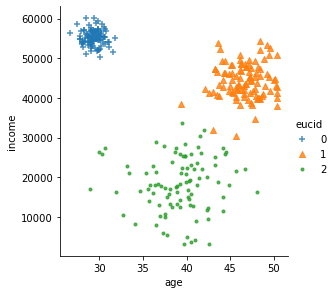

In [89]:
markers = ['+','^','.']
sn.lmplot( "age", "income",data=data,hue = "eucid",fit_reg=False,markers = markers,size = 4 );

## <font color='Blue'>Manhattan Clusters</font>

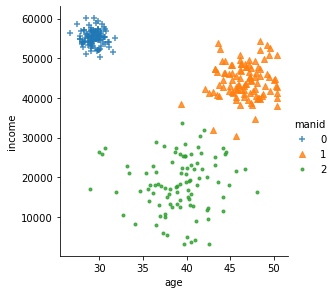

In [90]:
sn.lmplot( "age", "income",data=data,hue = "manid",fit_reg=False,markers = markers,size = 4 );

## <font color='Blue'>Chebyshev Clusters</font>

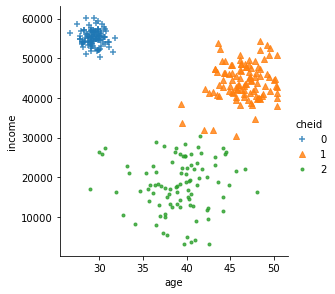

In [91]:
sn.lmplot( "age", "income",data=data,hue = "cheid",fit_reg=False,markers = markers,size = 4 );

## <font color='Blue'>Obtaining Cluster Clusters Euclidean</font>

In [92]:
euc_result = data.groupby('eucid')['age','income'].agg( ["median",'std'] ).reset_index() 
cluster_size = data.groupby(['eucid']).size() 
euc_result['cluster_size'] = cluster_size
euc_result

eucid     age             income              cluster_size
         median       std   median          std             
0     0  29.375  0.921458  55200.0  1951.943864          100
1     1  46.700  2.151559  44300.0  4390.321503          103
2     2  39.450  3.558665  18200.0  6924.747691           97

## <font color='Blue'>Obtaining Cluster Clusters Manhattan</font>

In [93]:
man_result = data.groupby('manid')['age','income'].agg( ["median",'std'] ).reset_index() 
cluster_size = data.groupby(['manid']).size() 
man_result['cluster_size'] = cluster_size
man_result

manid     age             income              cluster_size
         median       std   median          std             
0     0  29.375  0.921458  55200.0  1951.943864          100
1     1  46.700  2.151559  44300.0  4390.321503          103
2     2  39.450  3.558665  18200.0  6924.747691           97

## <font color='Blue'>Obtaining Cluster Clusters Chebychev</font>

In [94]:
che_result = data.groupby('cheid')['age','income'].agg( ["median",'std'] ).reset_index() 
cluster_size = data.groupby(['cheid']).size() 
che_result['cluster_size'] = cluster_size
che_result

cheid     age             income              cluster_size
         median       std   median          std             
0     0  29.375  0.921458  55200.0  1951.943864          100
1     1  46.650  2.286614  43700.0  4625.858004          105
2     2  39.450  3.583908  18200.0  6660.910355           95